In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("AI2.csv",index_col=0)
df.head()



,Sex,No. of Transactions,Monthly Payment,No. of months in Silver,Decision
Customer No.,,,,,
1,0,8,301,4,Remain
2,1,18,448,8,Downgrade
3,0,5,305,9,Remain
4,1,3,309,6,Downgrade
5,0,11,522,10,Remain


In [38]:
df.shape


(15, 5)

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Decision'])
y=le.transform(df['Decision'])
print(y)  #remain是1 downgrade 0, upgrade 2

[1 0 1 0 1 0 2 2 0 2 0 2 1 1 1]


In [65]:
features=['Sex','No. of Transactions','Monthly Payment','No. of months in Silver']
X=df[features]
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import numpy as np
scores=[]
k_accuracy = []
k_range=range(1,10)
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    accuracy = cross_val_score(knn,X,y,cv=3,scoring='accuracy')
    score=-cross_val_score(knn,X,y,cv=3,scoring='neg_mean_squared_error')
    scores.append(np.mean(score))
    k_accuracy.append(accuracy.mean())#计算均值得分
print(scores)
print(k_accuracy)

[1.3777777777777775, 1.4944444444444445, 1.4944444444444445, 1.038888888888889, 0.7055555555555556, 0.9388888888888888, 1.038888888888889, 1.038888888888889, 0.5888888888888889]
[0.18888888888888888, 0.12222222222222223, 0.12222222222222223, 0.41111111111111115, 0.49444444444444446, 0.2611111111111111, 0.41111111111111115, 0.41111111111111115, 0.41111111111111115]


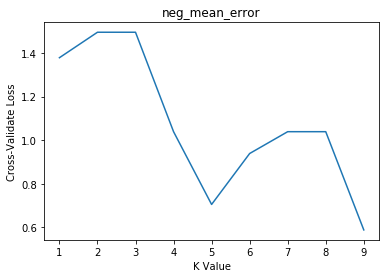

In [61]:
import matplotlib.pyplot as plt    

plt.plot(k_range, scores)
plt.title('neg_mean_error')  
plt.xlabel('K Value')  
plt.ylabel('Cross-Validate Loss')  
plt.show()

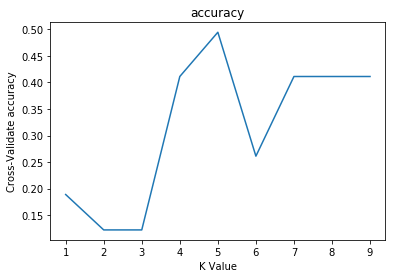

In [66]:
plt.plot(k_range, k_accuracy)
plt.title('accuracy')  
plt.xlabel('K Value')  
plt.ylabel('Cross-Validate accuracy')  
plt.show()